# Task 4 a: Utilization Prediction using Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline


In [2]:
Input_hourly = pd.read_csv('input_hourly.csv', parse_dates=['date'])


X_site1 = Input_hourly.drop(["time_id", "date", "site1_utilization_percentage", "site2_utilization_percentage"], axis=1)
y_site1 = Input_hourly["site1_utilization_percentage"]

X_site2 = Input_hourly.drop(["time_id", "date", "site1_utilization_percentage", "site2_utilization_percentage"], axis=1)
y_site2 = Input_hourly["site2_utilization_percentage"]


X_train_site1, X_test_site1, y_train_site1, y_test_site1 = train_test_split(X_site1, y_site1, test_size=0.3, random_state=42)

X_train_site2, X_test_site2, y_train_site2, y_test_site2 = train_test_split(X_site2, y_site2, test_size=0.3, random_state=42)

X_train_site1_original = X_train_site1.copy()
X_test_site1_original = X_test_site1.copy()

X_train_site1 = X_train_site1.drop(["hour", "month", "dayOfTheWeek"], axis=1)
X_test_site1 = X_test_site1.drop(["hour", "month", "dayOfTheWeek"], axis=1)

scaler_site1 = StandardScaler()
scaler_site1.fit(X_train_site1)

X_train_site1 = scaler_site1.transform(X_train_site1)
X_test_site1 = scaler_site1.transform(X_test_site1)

X_train_site2_original = X_train_site2.copy()
X_test_site2_original = X_test_site2.copy()

X_train_site2 = X_train_site2.drop(["hour", "month", "dayOfTheWeek"], axis=1)
X_test_site2 = X_test_site2.drop(["hour", "month", "dayOfTheWeek"], axis=1)

scaler_site2 = StandardScaler()
scaler_site2.fit(X_train_site2)

StandardScaler()

In [3]:
def polynomial_regression(X_train, y_train, X_test, y_test, X_test_original, degree, site_name):
 
    poly = PolynomialFeatures(degree)
    X_poly_train = X_train
    X_poly_test = X_test

 
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

  
    y_pred = model.predict(X_poly_test)

    all_values = X_test_site2_original
    all_values["true_utilization"] = y_test
    all_values["predicted_values"] = y_pred
    weekday_values = all_values[all_values['dayOfTheWeek'].isin([0, 4])]

 
    print("RMSE: ", np.sqrt(mean_squared_error(y_test_site1, y_pred)))
    print("MAE: ", mean_absolute_error(y_test_site1, y_pred))
    print("MAPE: ", mean_absolute_percentage_error(y_test_site1, y_pred))

  
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test_original["hour"], y_test, label='True Utilization', marker='x', alpha=0.5)
    plt.scatter(X_test_original["hour"], y_pred, label='Predicted Utilization', color='red', marker='x' , alpha=0.5)
    plt.title(f'Polynomial Regression - {site_name}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Utilization Percentage')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.scatter(weekday_values['hour'], weekday_values["true_utilization"], label='True Utilization', marker='x', alpha=0.5)
    plt.scatter(weekday_values['hour'], weekday_values["predicted_values"], label='Predicted Utilization', marker='x', alpha=0.5)
    plt.title(f'Polynomial Regression weekdays- {site_name}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Utilization Percentage')
    plt.legend()
    plt.show()



RMSE:  15.110381499371664
MAE:  11.375121180413702
MAPE:  2.0431577437987456e+16


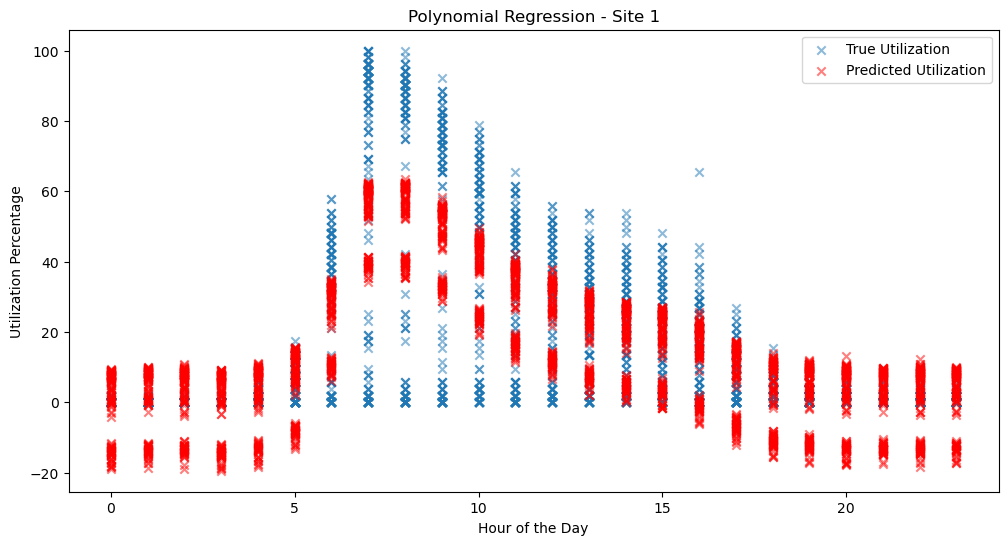

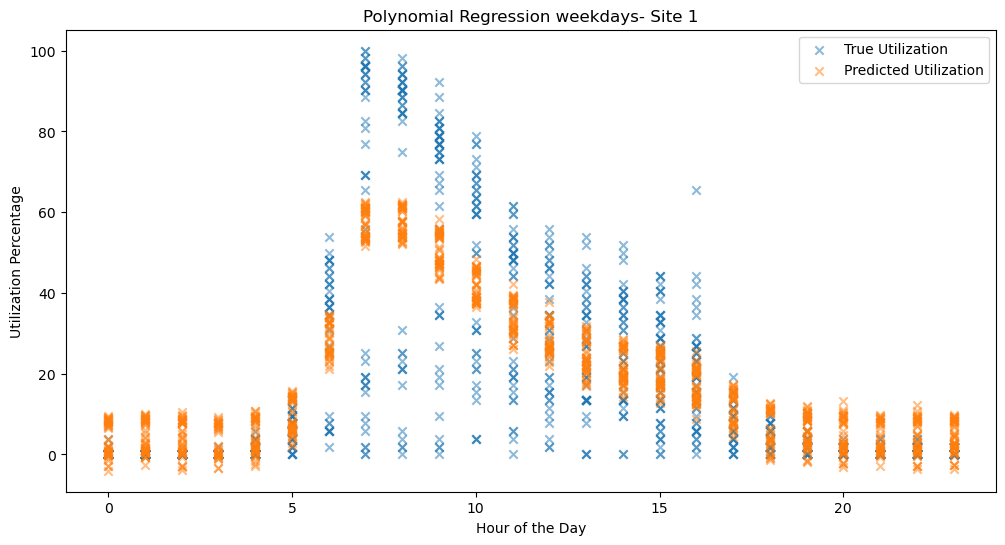

In [4]:
polynomial_regression(X_train_site1, y_train_site1, X_test_site1, y_test_site1, X_test_site1_original, degree=3, site_name='Site 1')

RMSE:  23.943157755978905
MAE:  13.310086912998417
MAPE:  7880376923235975.0


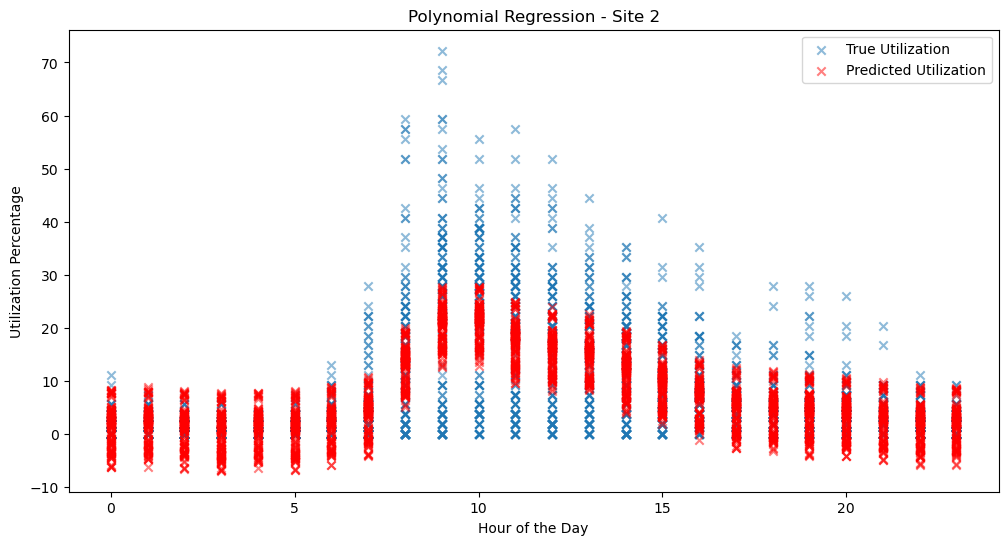

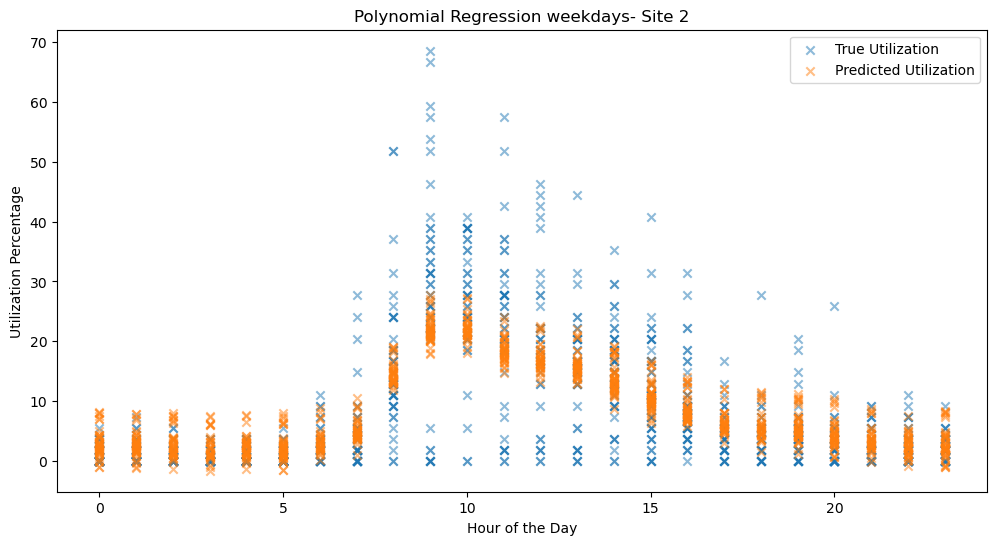

In [5]:
polynomial_regression(X_train_site2, y_train_site2, X_test_site2, y_test_site2, X_test_site1_original, degree=3, site_name='Site 2')